# EE5601 Representation Learning

# Homework 0



In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

(512, 512, 3)

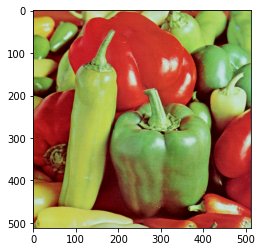

In [3]:
I1 = mpimg.imread('4.2.07.tiff')
plt.imshow(I1)
#print(I1)
np.shape(I1)

In [4]:
S1,S2,S3 = np.shape(I1)

In [5]:
R_comp = I1[:,:,0]
G_comp = I1[:,:,1]
B_comp = I1[:,:,2]

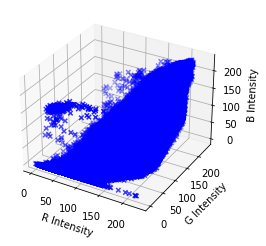

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# converting to 1D lists for plotting as per requirements of matplotlib Axes3D
R = R_comp.flatten()
G = G_comp.flatten()
B = B_comp.flatten()

ax.scatter(R,G,B,c='b',marker='x')

ax.set_xlabel('R Intensity')
ax.set_ylabel('G Intensity')
ax.set_zlabel('B Intensity')

plt.show()

In [7]:
# dxN data matrix with 'R','G' and 'B' as dimensions and pixels as data points...
X = I1.reshape((S1*S2,S3)).transpose()
print(X)
K = 4
epsilon = 0.1

[[101 140 151 ... 166 171 198]
 [  0   0   0 ... 199 205 200]
 [  0 142 146 ... 150 181 171]]


In [8]:
def K_means(X,K,epsilon):
    dim,N = np.shape(X)
    K_rand = np.random.choice(N,K) #choosing K random points from total of N in our dataset
    centroids = np.zeros((dim,K)) 
    for i in range(K):
        centroids[:,i] = X[:,K_rand[i]]
    shift = 100
    while(shift>epsilon):
        label_index = np.zeros((1,N)) # a list to store labels (k for which r_nk = 1 for a given datapoint n)
        norm_min = np.zeros((1,N)) # list of minimum norms for a given data point
        for i in range(N):
            diff_mat = centroids-X[:,i].reshape(dim,1) #subtracting each datapoint from centroids matrix
            norms = np.linalg.norm(diff_mat,axis=0) #norm of distance from each centroid
            norm_min[0,i] = np.amin(norms,axis=0) #minimum norm stored
            label_index[0,i] = np.argmin(norms, axis=0) #index of minimum norm stored
        J = np.square(np.linalg.norm(norm_min,axis=1)) # COST FUNCTION
        print(J)
        new_centroids = np.zeros((dim,K)) #updating centroids
        for k in range(K):
            label_k = np.reshape(1*np.array(label_index==k),[-1,1]) #row vector with 1 at indices corresponsing to datapoints wil label 'k'
            new_centroids[:,k] = np.divide(np.matmul(X,label_k)[:,0],np.sum(1*np.array(label_index==k)))
        print(new_centroids)
        shift = np.sum(np.abs(centroids-new_centroids))
        print(shift)
        centroids = new_centroids
    return centroids,label_index
    

In [10]:
centroids_final,label_index_final = K_means(X,K,epsilon)

[7.90519962e+08]
[[ 90.52246754 114.16114304 163.32115339 188.05326139]
 [ 33.49788152 140.42950192 191.84202541  46.86584813]
 [ 21.17556169  65.025      105.35978043  40.45311128]]
169.20839145433945
[4.71270999e+08]
[[ 84.80672536 118.71636912 170.03824387 188.24894563]
 [ 19.45230532 143.26886544 195.70596177  48.69685179]
 [ 15.00408423  67.55187883 109.74217518  41.17551583]]
53.56677830355467
[4.43215602e+08]
[[ 82.3997685  120.57248895 173.00269291 187.08140406]
 [ 16.72736261 146.10459356 197.51211223  48.78939041]
 [ 13.51621693  69.05889383 112.06793434  41.07622696]]
21.274357531576307
[4.38335214e+08]
[[ 81.12525322 121.7729485  174.72371711 186.18713067]
 [ 16.25374277 148.39151146 198.48113721  48.73012624]
 [ 13.12752606  70.2001864  113.44597371  40.92706926]]
11.936279805910855
[4.3643016e+08]
[[ 80.44829308 122.58860443 175.8532553  185.60836394]
 [ 16.21414479 149.99006533 199.0770669   48.71822675]
 [ 13.01236171  71.00458853 114.34330499  40.83694772]]
7.353921321

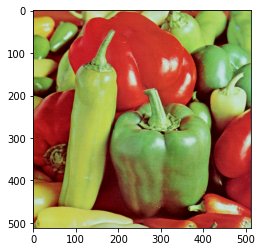

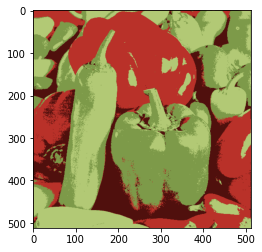

In [213]:
K=4
#print(label_index_final)
centroids_final = np.round(centroids_final)
#print(centroids_final)
X_clustered = np.zeros(np.shape(X))
for k in range(K):
    temp = np.tile(np.reshape(np.round(centroids_final)[:,k],[-1,1]),(1,S1*S2))
    X_clustered += temp*(1*np.array(label_index_final==k))

R = np.reshape(X_clustered[0,:],(S1,S2))
G = np.reshape(X_clustered[1,:],(S1,S2))
B = np.reshape(X_clustered[2,:],(S1,S2))

I1_new = np.dstack((R,np.dstack((G,B))))
I1_new = I1_new.astype(int)
#print(I1)
#print(I1_new)
plt.imshow(I1)
plt.show()
plt.imshow(I1_new)
plt.show()

## Principle Component Analysis

In [55]:
#Mean Normalisation
X_mean = np.reshape(np.mean(X,axis=1),[-1,1])
X_N = X - X_mean

sigma_X = np.divide(np.matmul(X_N,np.transpose(X_N)),S1*S2)

print("Covariance Matrix Cxx")
print(sigma_X)

Covariance Matrix Cxx
[[2040.72747817  932.94120734  790.62640192]
 [ 932.94120734 5631.91623187 2784.82392069]
 [ 790.62640192 2784.82392069 1961.19134567]]


In [56]:
eig_vals,eig_vects = np.linalg.eig(sigma_X)
P = np.transpose(eig_vects)
Y_N = np.matmul(P,X_N)
sigma_Y = np.divide(np.matmul(Y_N,np.transpose(Y_N)),S1*S2)
print("Covariance Matrix Cyy")
print(sigma_Y.astype(int))
Y = Y_N + X_mean
Y = np.clip(Y,0,255)


Covariance Matrix Cyy
[[7399    0    0]
 [   0 1818    0]
 [   0    0  415]]


### Hence, we shall conclude that Y is decorrelated since sigma_Y is a Diagonal Matrix...

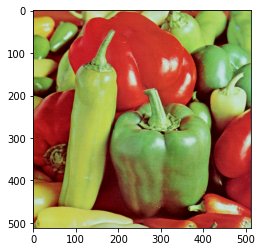

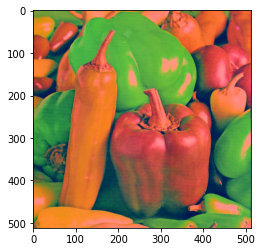

In [57]:
Ry = np.reshape(Y[0,:],(S1,S2))
Gy = np.reshape(Y[1,:],(S1,S2))
By = np.reshape(Y[2,:],(S1,S2))

I1_Y = np.dstack((Ry,np.dstack((Gy,By))))
I1_Y = I1_Y.astype(int)

plt.imshow(I1)
plt.show()
plt.imshow(I1_Y)
plt.show()

<div class="alert alert-info"><h3>Summary and Takeaways:-</h3><p>1)Principal Component Analysis, or PCA, is a dimensionality-reduction method.Its idea is simple, reduce the dimensionality of a dataset, while preserving as much ‘variability’ (i.e. statistical information) as possible. </p> <p> 2) Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade as little accuracy as possible. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.</p> 
<div class="alert alert-info"><h3>How will you check if your algorithm is working as intended?</h3><p>We can say the algorithm is working as intended, when the covariance matrix($C_{YY}$) looks like a diagonal matrix, because the main goal of PCA is to decorrelate the data. When the covariance matrix is diagonal matrix we can say that the components are decorrelated and orthogonal.</p></div>
<div class="alert alert-info"><h3> Examples where PCA fails.</h3><p>
 1) In classification problem, when the differentiating characteristics of the classes are not reflected in variance of the variables, PCA may not be a good choice of data processing. This is because PCA does not take into account class information when calculating the principal components. PCA is bad to perform on a dataset prior to classification because PCA finds a lower dimensional representation of the data that minimizes the squared reconstruction error. If we have irrelevant features, PCA counts errors in those with equal importance as errors in words that are important for our classification.</p>
    <p>2) PCA always expresses the data as the linear combination of the eigen vectors. When the data cannot be expressed as the linear combination of eigen vectors PCA fails.</p>
    <p>3)  PCA considers the low variance components in the data to be noise and recommends us to geti rid of those components. But, sometimes those components may play a major role in a given supervised learning task.</p></div>

## Maximum Likelihood Estimates

 ### For all distributions it is common to note:  X = (X_1,X_2,...,X_n) are iid observations from the correcponding distribution with unknown parameters 

## Binomial Distribution

PDF for binomial:
$$p_x(k|p) = {{n}\choose{k}}p^{k}(1-p)^{n-k}$$
The unknown parameter here is p.
The likelihood function for X={x1,x2,x3...} iid is defined as.,
$$L(p|x) = p_x(x_1|p) \times p_x(x_2|p) \times ....\times p_x(x_n|p) $$
$$L(p|x) = \prod_{i=1}^{n}p_x(x_i|p) $$
Suppose that X is an observation from a binomial distribution, X ~ Bin(n,p) where n is known and p is to be estimated. The likelihood function is..,
$$ L(p;x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} $$
Applying log on both sides..,

$$\log{L(p|x)} = \log({{n}\choose{x_i}}p^{x}(1-p)^{n-x}) $$

Differentiating on both sides with respect to p and equating to zero..,
$$\frac{\partial\log{L(p|x)}}{\partial p} = \frac{\partial \log {{n}\choose{x}}}{\partial p} + \frac{\partial \log p^{x}}{\partial p} + \frac{\partial \log (1-p)^{n-x}}{\partial p} $$
$$ 0 = \frac{x}{p} - \frac{n-x}{1-p} $$
$$ \implies (1-p)x + px = np$$
$$ \implies \hat{p} = \frac{x}{n} $$

Hence,for X ~ Bin(N,p)
$$\boxed{\hat p = \frac{X}{N}}$$



For samples = 500
probability : 0.4
probability(predicted) : 0.40276


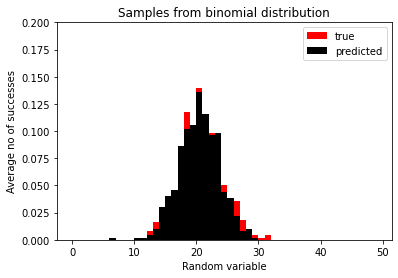

For samples = 1000
probability : 0.4
probability(predicted) : 0.40206


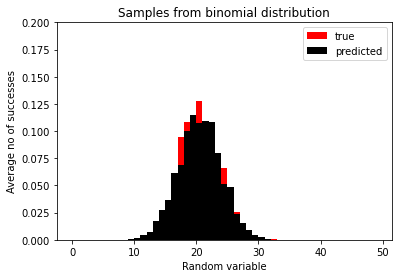

For samples = 1500
probability : 0.4
probability(predicted) : 0.4010533333333333


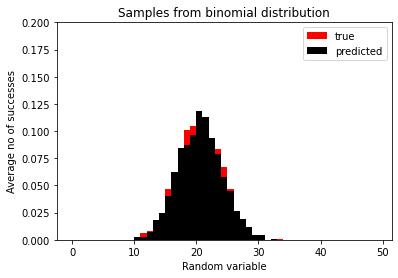

For samples = 2000
probability : 0.4
probability(predicted) : 0.39805


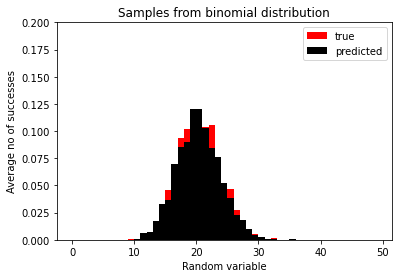

For samples = 2500
probability : 0.4
probability(predicted) : 0.399656


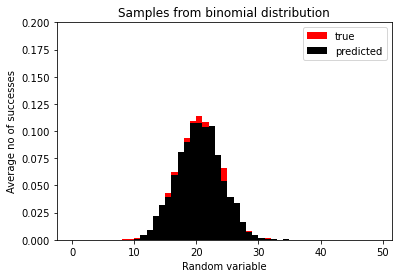

For samples = 3000
probability : 0.4
probability(predicted) : 0.3991866666666667


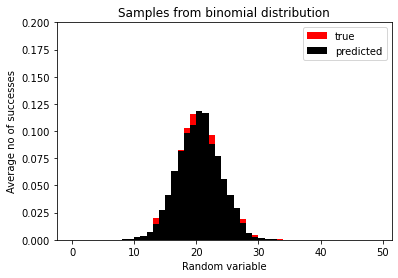

In [101]:
def hist_binomial(samples,N,p,p_pred,k):
    plt.figure()
    plt.hist(samples,bins=np.arange(N),density=True,color='red',label='true')
    print("probability : "+ str(p))
    print("probability(predicted) : "+str(p_pred))
    plt.ylim(0,0.2)
    samples_pred = np.random.binomial(N,p_pred,k)
    plt.hist(samples_pred,bins=np.arange(N),density=True,color='black',label='predicted')
    plt.legend()
    plt.xlabel('Random variable')
    plt.ylabel('Average no of successes')
    plt.title('Samples from binomial distribution')
    plt.show()
    return

for k in range(500,3001,500):
    print("For samples = "+str(k))
    N = 50   # number of experimental trials 
    p = 0.4  
    samples = np.random.binomial(N, p, k)    
    p_pred = np.sum(samples)/(N*k)
    hist_binomial(samples,N,p,p_pred,k)
    

## Poisson Distribution

PDF for the poisson distribution:
$$ f(x, \lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!} $$
The unknown parameter is $\lambda$.
$\lambda$. The likelihood function is given by.,
$$ L(\lambda;x) = \prod_{i=1}^{n}f(x_i;\lambda)$$
$$ L(\lambda;x) = \prod_{i=1}^{n}\frac{\lambda^{x_i}e^{-\lambda}}{x_i!}$$
$$ L(\lambda;x) = \frac{\lambda^{\sum_{i=1}^{n}x_i}e^{-n\lambda}}{x_1!x_2!...x_n!}$$
Applying log on both sides:
$$ \log L(\lambda;x) = \sum_{i=1}^{n}x_i\log{\lambda} - n\lambda \log e + \log \frac{1}{x_1!x_2!...x_n!}$$

For finding the approximate value of $\lambda$, Differentiate the above equation and equate to zero to find the maximum likelihood function of $\lambda$..,
$$ \frac{\partial{\log L(\lambda;x)}}{{\partial \lambda}} = \frac{\sum_{i=1}^{n}x_i}{{\lambda}} - n$$
$$ \frac{\sum_{i=1}^{n}x_i}{{\lambda}} - n = 0$$
$$ \implies \boxed{\hat{\lambda} = \frac{\sum_{i=1}^{n}x_i}{n}}$$

For N = 500
Lambda : 5
Lambda(predicted) : 5.002


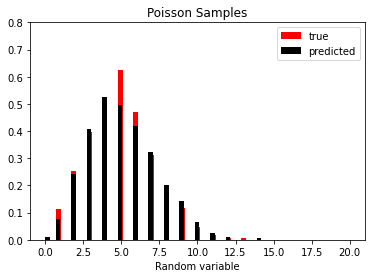

For N = 1000
Lambda : 5
Lambda(predicted) : 4.991


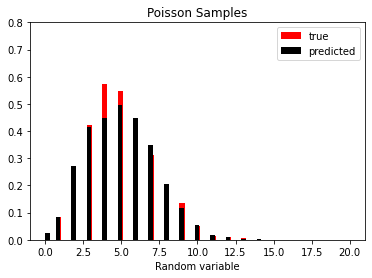

For N = 1500
Lambda : 5
Lambda(predicted) : 4.921333333333333


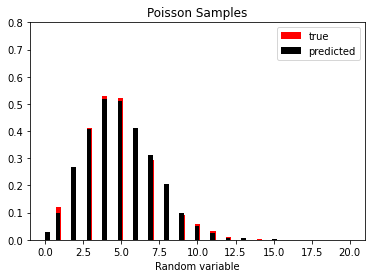

For N = 2000
Lambda : 5
Lambda(predicted) : 5.031


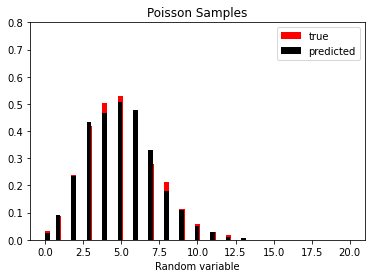

For N = 2500
Lambda : 5
Lambda(predicted) : 4.97


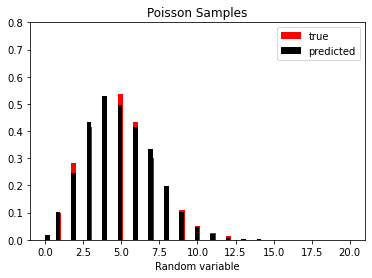

For N = 3000
Lambda : 5
Lambda(predicted) : 4.949666666666666


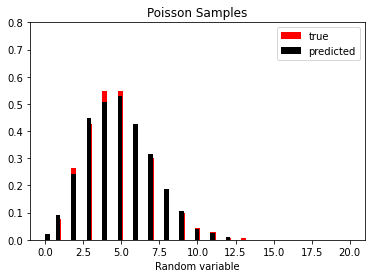

In [102]:
def hist_poisson(samples,N,Lambda,Lambda_pred):
    plt.figure()
    plt.hist(samples,bins = np.linspace(0,20,60),density=True,color='red',label='true')
    print("Lambda : "+ str(Lambda))
    print("Lambda(predicted) : "+str(Lambda_pred))
    plt.ylim(0,0.8)
    samples_pred = np.random.poisson(Lambda_pred,N)
    plt.hist(samples_pred,bins=np.linspace(0,20,60),density=True,color='black',width = 0.3,label='predicted')
    plt.legend()
    plt.xlabel('Random variable')
    plt.title('Poisson Samples')
    plt.show()
    return

for N in range(500,3001,500):
    Lambda = 5   
    print("For N = "+str(N))
    samples =  np.random.poisson(Lambda,N)         
    Lambda_pred = np.mean(samples)
    hist_poisson(samples,N,Lambda,Lambda_pred)


## Exponential Distribution

PDF for the exponential distribution:
$$ f(x, \lambda_0) = \lambda_0e^{-\lambda_0x} $$
The rate parameter $\lambda _{0}$ needs to be estimated.
$\lambda_0$.
The likelihood function is given by.,
$$ L(\lambda_0|x_1,x_2...) = \lambda_0^n \prod_{i=1}^{n}e^{-\lambda_0x_i} $$
$$ L(\lambda_0|x_1,x_2...) = \lambda_0^n e^{-\lambda_0\sum_{i=1}^{n}x_i} $$
Applying log for the likelihood function..,
$$ \log L(\lambda_0|x_1,x_2...) = n\log \lambda_0 - \lambda_0\sum_{i=1}^{n}x_i$$
Now differentiate the above expression with respect to $\lambda_0$..,
$$ \frac{\partial{\log L(\lambda_0|x_1,x_2...)}}{\partial \lambda_0} = \frac{n}{\lambda_0} - \sum_{i=1}^{n}x_i$$
$$ 0 = \frac{n}{\lambda_0} - \sum_{i=1}^{n}x_i$$
$$ \implies\boxed{\hat{\lambda_0} = \frac{n}{\sum_{i=1}^{n}x_i}}$$

For N = 500
Original Lambda : 5
predicted Lambda : 5.049008728355531


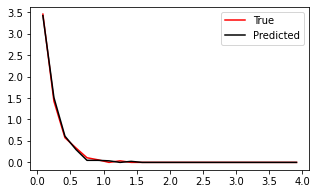

For N = 1000
Original Lambda : 5
predicted Lambda : 5.137437104291359


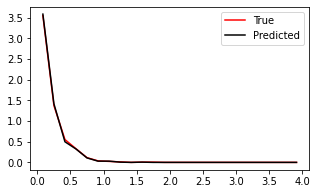

For N = 1500
Original Lambda : 5
predicted Lambda : 4.973115652552072


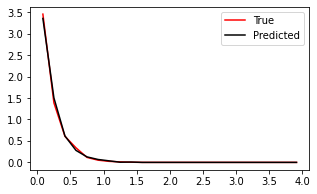

For N = 2000
Original Lambda : 5
predicted Lambda : 4.942218490386455


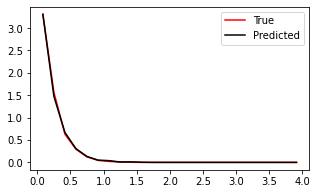

For N = 2500
Original Lambda : 5
predicted Lambda : 5.121484874563153


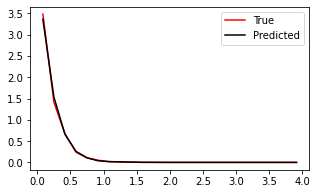

For N = 3000
Original Lambda : 5
predicted Lambda : 5.020776472645455


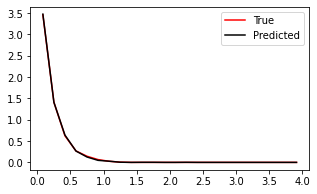

In [106]:
def plot_exp(samples,N,Lambda,Lambda_pred):
    print("Original Lambda : "+ str(Lambda))
    print("predicted Lambda : "+str(Lambda_pred))
    hist1, bins1 = np.histogram(samples, bins=np.linspace(0, 4, 25), density=True)
    centers_bin1 = 0.5*(bins1[1:] + bins1[:-1])
    samples_pred = np.random.exponential(1/Lambda_pred,N)
    hist2, bins2 = np.histogram(samples_pred, bins=np.linspace(0, 4,25), density=True)
    centers_bin2 = 0.5*(bins2[1:] + bins2[:-1])
    plt.figure(figsize=(5, 3))
    plt.plot(centers_bin1, hist1, label="True",color='red')
    plt.plot(centers_bin2, hist2, label="Predicted",color='black')
    plt.legend()
    plt.show()
    return


for N in range(500,3001,500):
    print("For N = "+str(N))
    Lambda = 5   
    samples =  np.random.exponential(1/Lambda, N)   
    Lambda_pred = len(samples)/np.sum(samples)
    plot_exp(samples,N,Lambda,Lambda_pred)

## Gaussian Distribution

PDF for the gaussian distribution:
$$ f(x, \mu, \sigma) = \frac{e^{\frac{-1}{2}\frac{(x-\mu)^2}{\sigma^2}}}{\sqrt{2\pi\sigma^2}} $$
The mean $\mu$ and the variance $\sigma^{2}$ are the two parameters that need to be estimated.


The likelihood function is given by.,
$$L(\mu,\sigma;X) = \prod_{i=1}^{n}f_x(x_i;\mu,\sigma)$$
Applying log on both sides.,
$$\log L(\mu,\sigma;X) = {\frac{-\sum_{i=1}^{n}(x_i-\mu)^2}{2\sigma^2}}+\log \frac{1}{{(2\pi\sigma^2)}^{\frac{n}{2}}}$$
**Finding estimate for mean 
$$ \frac{\partial{\log L(\mu,\sigma;X)}}{\partial \mu} = {\frac{-2\sum_{i=1}^{n}(x_i-\mu)(-1)}{2\sigma^2}}=0$$
$$ \sum_{i=1}^{n}x_i - n\mu = 0$$
$$\implies \boxed{\hat{\mu} = \frac{\sum_{i=1}^{n}x_i}{n}} $$
**Finding estimate for variance \
$$ \frac{\partial{\log L(\mu,\sigma;X)}}{\partial \sigma} = \frac{\partial {\frac{-\sum_{i=1}^{n}(x_i-\mu)^2}{2\sigma^2}}}{\partial \sigma}+\frac{\log {(2\pi\sigma^2)}^{\frac{-n}{2}}}{\partial \sigma}$$
$$ 0 = \frac{\sum_{i=1}^{n}(x_i-\mu)^2}{\sigma^3} - \frac{n}{\sigma}$$
$$ \sum_{i=1}^{n}(x_i-\mu)^2 = n\sigma^2$$
$$ \hat{\sigma} = \frac{\sum_{i=1}^{n}(x_i-\hat{\mu})^2}{n}$$

For N = 1000
Mean : 1
Variance : 0.7
Predicted mean : 0.9762238517009884
Predicted variance : 0.6969251726369764


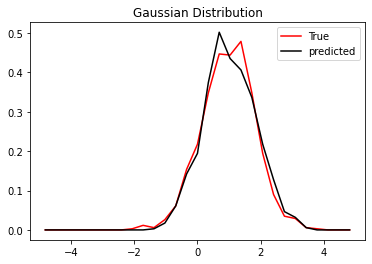

For N = 2000
Mean : 1
Variance : 0.7
Predicted mean : 0.9993906693447264
Predicted variance : 0.7060923849302774


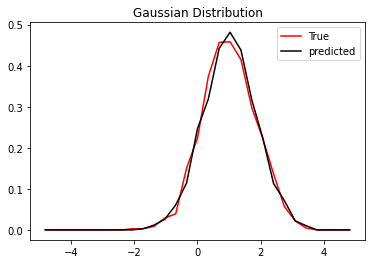

For N = 3000
Mean : 1
Variance : 0.7
Predicted mean : 1.0011797951930022
Predicted variance : 0.7479683239725892


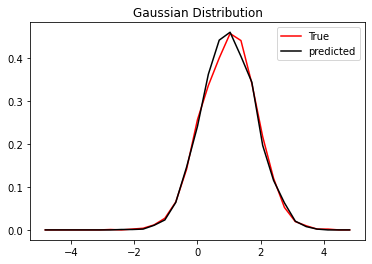

For N = 4000
Mean : 1
Variance : 0.7
Predicted mean : 0.9792950562335606
Predicted variance : 0.7020008672040895


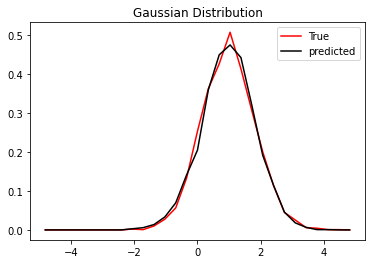

For N = 5000
Mean : 1
Variance : 0.7
Predicted mean : 0.9895347270221729
Predicted variance : 0.703768582923951


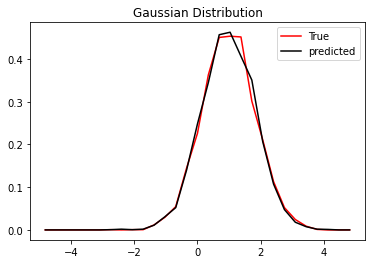

For N = 6000
Mean : 1
Variance : 0.7
Predicted mean : 1.0072516823495001
Predicted variance : 0.6907501789598528


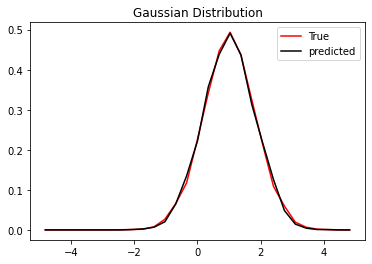

For N = 7000
Mean : 1
Variance : 0.7
Predicted mean : 0.9873822349876256
Predicted variance : 0.7128980561434513


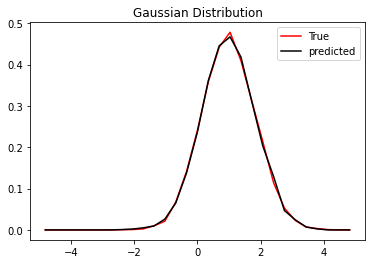

For N = 8000
Mean : 1
Variance : 0.7
Predicted mean : 1.0092600437451562
Predicted variance : 0.7113538432642501


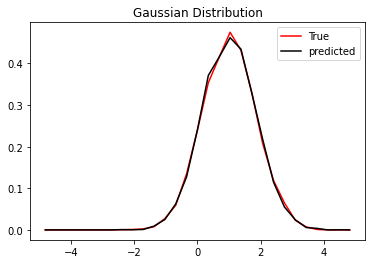

For N = 9000
Mean : 1
Variance : 0.7
Predicted mean : 0.9840473960105921
Predicted variance : 0.695115920289103


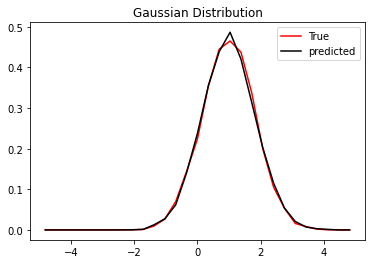

For N = 10000
Mean : 1
Variance : 0.7
Predicted mean : 1.0152030926171436
Predicted variance : 0.7019720745725184


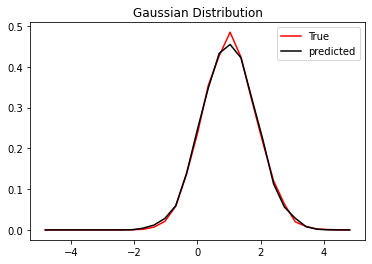

In [104]:
def plot_gaussian(samples,N,mean,variance,mean_pred,variance_pred):
    print("Mean : "+ str(mean))
    print("Variance : "+ str(variance))
    print("Predicted mean : "+str(mean_pred))
    print("Predicted variance : "+str(variance_pred))
    hist1, bins1 = np.histogram(samples, bins=np.linspace(-5,5,30), density=True)
    centers_bin1 = 0.5*(bins1[1:] + bins1[:-1])
    samples_pred = np.random.normal(mean_pred,np.sqrt(variance_pred),N)
    hist2, bins2 = np.histogram(samples_pred, bins=np.linspace(-5,5,30), density=True)
    centers_bin2 = 0.5*(bins2[1:] + bins2[:-1])
    plt.figure(figsize=(6, 4))
    plt.title("Gaussian Distribution")
    plt.plot(centers_bin1, hist1,color='red',label="True")
    plt.plot(centers_bin2, hist2,color='black',label="predicted")
    plt.legend()
    plt.show()
    return

for N in range(1000,10001,1000):
    mean = 1   
    variance = 0.7  
    print("For N = "+str(N))
    samples = np.random.normal(mean,np.sqrt(variance),N)   
    mean_pred = np.mean(samples)
    variance_pred = np.mean((samples-mean_pred)**2)
    plot_gaussian(samples,N,mean,variance,mean_pred,variance_pred)

## Laplace Distribution

PDF for the Laplace distribution:
$$ f(x; \mu, b) = \frac{e^{-\frac{|x-\mu|}{b}}}{2b} $$
The location parameter $\mu$ and the scale b are the two parameters that need to be estimated.


The likelihood function is given by., 
$$L(\mu,b;X) = \prod_{i=1}^{n}\frac{e^-{\frac{|x_i-\mu|}{b}}}{2b}$$

Taking log:
$$ \log L(\mu,b;X) = -\sum_{i=1}^{n}\frac{|x_i-\mu|}{b} + \log \frac{1}{2b}$$
**For finding estimate of location parameter $\mu$.,**

Differentiating with $\mu$,
$$ \frac{\partial \log L(\mu,b;X)}{\partial \mu} = -\frac{1}{b}\frac{\partial \sum_{i=1}^{n}|x_i-\mu|}{\partial \mu} + 0 $$
$$ 0 = -\frac{1}{b}\sum_{i=1}^{n}\text{sgn}(x_i-\mu)$$
$$ \sum_{i=1}^{n}\text{sgn}(x_i-\hat{\mu}) = 0$$


**For finding estimate of scale parameter b.,**
$$ \frac{\partial \log L(\mu,b;X)}{\partial b} = -\sum_{i=1}^{n}|x_i-\mu|\frac{\partial \frac{1}{b}}{\partial b} - \frac{\partial \log 2b}{\partial b}$$
$$ 0 = \frac{\sum_{i=1}^{n}|x_i-\mu|}{b^2} - \frac{2}{b}$$
$$ \frac{\sum_{i=1}^{n}|x_i-\mu|}{b^2} = \frac{2}{b}$$
$$ \implies \boxed{\hat{b} = \frac{\sum_{i=1}^{n}|x_i-\mu|}{2}} $$

For N = 1000
Mean : 1
b : 0.6
predicted Mean : 1.0192260901531234
predicted b : 0.6344756641038805


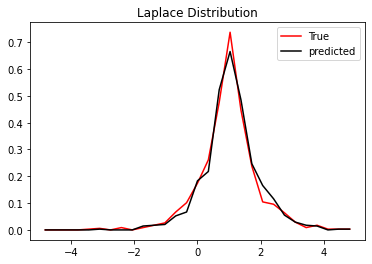

For N = 2000
Mean : 1
b : 0.6
predicted Mean : 1.0020038690886026
predicted b : 0.5943353364546622


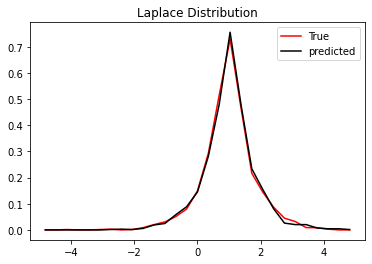

For N = 3000
Mean : 1
b : 0.6
predicted Mean : 1.0047887104527533
predicted b : 0.5935958290895988


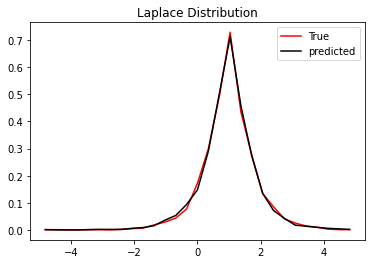

For N = 4000
Mean : 1
b : 0.6
predicted Mean : 1.0091317818515602
predicted b : 0.5999982752401993


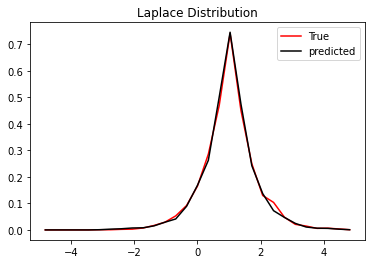

For N = 5000
Mean : 1
b : 0.6
predicted Mean : 0.9956604874639892
predicted b : 0.6026878728882775


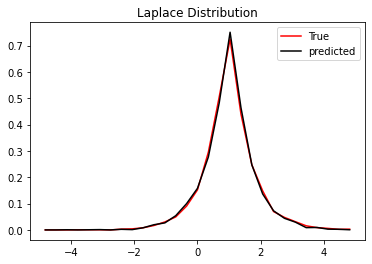

For N = 6000
Mean : 1
b : 0.6
predicted Mean : 1.0084763387942668
predicted b : 0.6008389060049996


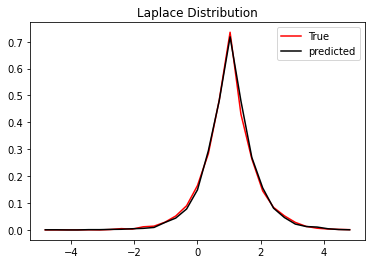

For N = 7000
Mean : 1
b : 0.6
predicted Mean : 1.001004577193211
predicted b : 0.6062669683977553


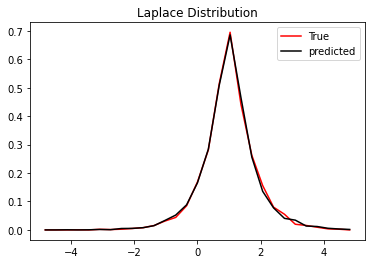

For N = 8000
Mean : 1
b : 0.6
predicted Mean : 0.9995304783344169
predicted b : 0.596329914321544


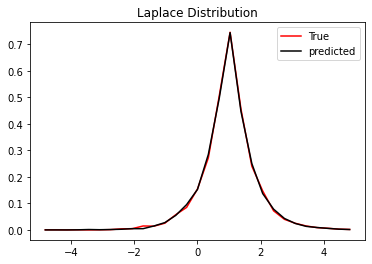

For N = 9000
Mean : 1
b : 0.6
predicted Mean : 1.005037642145356
predicted b : 0.6080460018057784


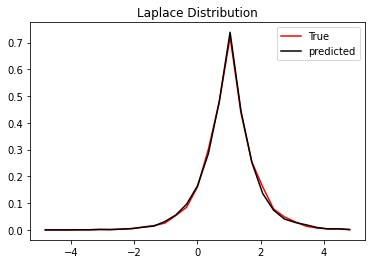

For N = 10000
Mean : 1
b : 0.6
predicted Mean : 0.9885129312661443
predicted b : 0.596160340887611


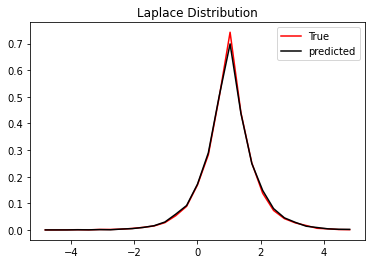

In [105]:
def plot_laplace(samples,N,mean,mean_pred,b,b_pred):
    
    print("Mean : "+ str(mean))
    print("b : "+ str(b))
    print("predicted Mean : "+str(mean_pred))
    print("predicted b : "+str(b_pred))
    hist1, bins1 = np.histogram(samples, bins=np.linspace(-5,5,30), density=True)
    centers_bin1 = 0.5*(bins1[1:]+bins1[:-1])
    samples_pred = np.random.laplace(mean_pred,b_pred,N)
    hist2, bins2 = np.histogram(samples_pred, bins=np.linspace(-5,5,30), density=True)
    centers_bin2 = 0.5*(bins2[1:] + bins2[:-1])
    plt.figure()
    plt.title("Laplace Distribution")
    plt.plot(centers_bin1, hist1,color='red',label="True")
    plt.plot(centers_bin2, hist2,color='black',label="predicted")
    plt.legend()
    plt.show()
    return

for N in range(1000,10001,1000):
    mean = 1   
    b = 0.6  
    print("For N = "+str(N))
    samples = np.random.laplace(mean, b, N)    
    mean_pred = np.median(samples)
    b_pred = np.sum(np.abs(samples-mean_pred))/len(samples)
    plot_laplace(samples,N,mean,mean_pred,b,b_pred)
 

<div class="alert alert-info"><h3>Conclusion:-</h3><p>1) Maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable.This helps in estimating the density which can be applied in Machine Learning.
    </p><p>2) We can observe that estimated parameters and original parameters are almost similar. And tend to be equal when the number of samples are large.</p><p>3) Maximum likelihood methods have desirable mathematical and optimality properties. They tend to be minimum variance unbiased estimators as the sample size increases. By unbiased, we mean that if we take (a very large number of) random samples, the average value of the parameter estimates will be theoretically exactly equal to the original value.</p></div>
